# Cirrhosis (Liver Disease) EDA & Prediction

1) ID: unique identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

sns.set_style()

In [2]:
data = pd.read_csv('C:/Users/hp/Desktop/mini-project/aarogyam/cirrhosis.csv')
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## Understanding Data

In [3]:
data.shape

(418, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [6]:
data.describe(exclude='number').T

,count,unique,top,freq
Status,418,3,C,232
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354


In [7]:
data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

## Handling Missing Values

In [8]:
round(data.isnull().sum()/len(data),3)

ID               0.000
N_Days           0.000
Status           0.000
Drug             0.254
Age              0.000
Sex              0.000
Ascites          0.254
Hepatomegaly     0.254
Spiders          0.254
Edema            0.000
Bilirubin        0.000
Cholesterol      0.321
Albumin          0.000
Copper           0.258
Alk_Phos         0.254
SGOT             0.254
Tryglicerides    0.325
Platelets        0.026
Prothrombin      0.005
Stage            0.014
dtype: float64

In [9]:
# Missing Values Filled Using Mode Values
data['Drug'].fillna('D-penicillamine', inplace=True)
data['Ascites'].fillna('N', inplace=True)
data['Hepatomegaly'].fillna('Y', inplace=True)
data['Spiders'].fillna('N', inplace=True)
data['Stage'].fillna(3.0, inplace=True)

# Missing Values Filled Using Median Values
data['Cholesterol'].fillna(309.5, inplace=True)
data['Copper'].fillna(73, inplace=True)
data['Alk_Phos'].fillna(1259, inplace=True)
data['SGOT'].fillna(114.7, inplace=True)
data['Tryglicerides'].fillna(108, inplace=True)
data['Platelets'].fillna(251, inplace=True)
data['Prothrombin'].fillna(10.60, inplace=True)

In [10]:
# Age is in days so I'll just convert it in years.
data['Age'] = data['Age']/365

## Creating a Backup

In [11]:
df = data.copy()

## Data Visualisation

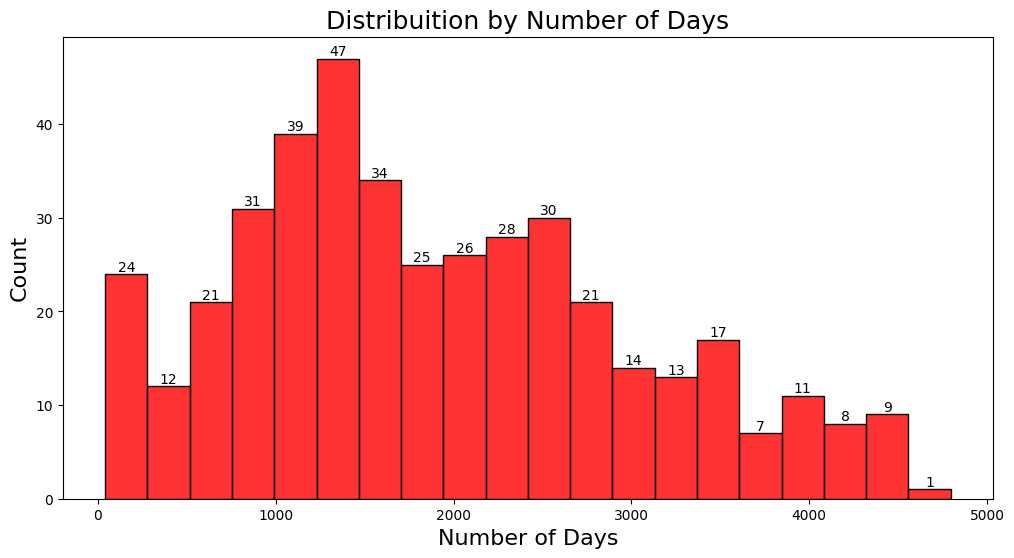

In [12]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Number of Days', fontsize=18)
ax = sns.histplot(data['N_Days'], bins=20, color='red', alpha=0.8)
plt.xlabel('Number of Days', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

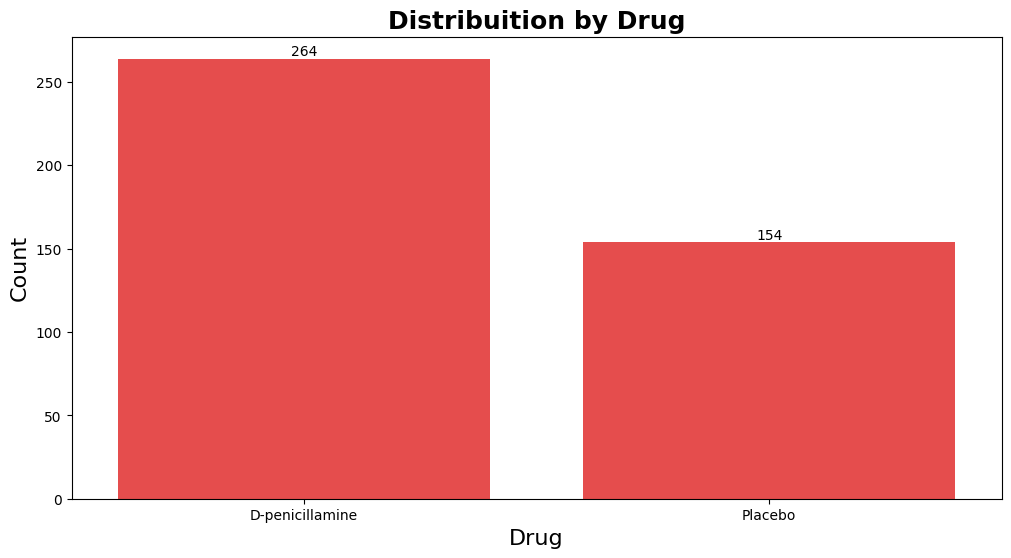

In [13]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Drug', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Drug'], color='red', alpha=0.8)
plt.xlabel('Drug', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

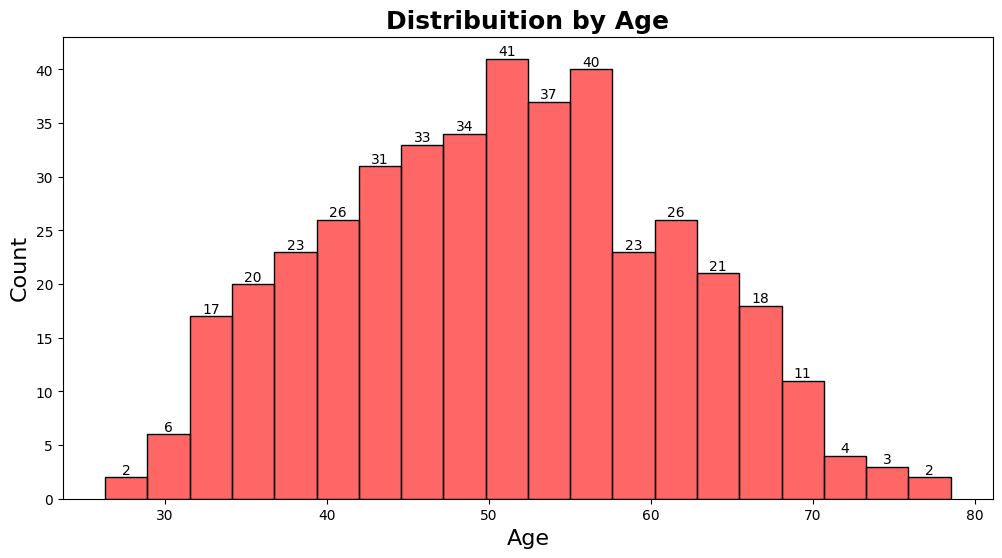

In [14]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Age', fontsize=18, fontweight='bold')
ax = sns.histplot(data['Age'], bins=20, color='red', alpha=0.6)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

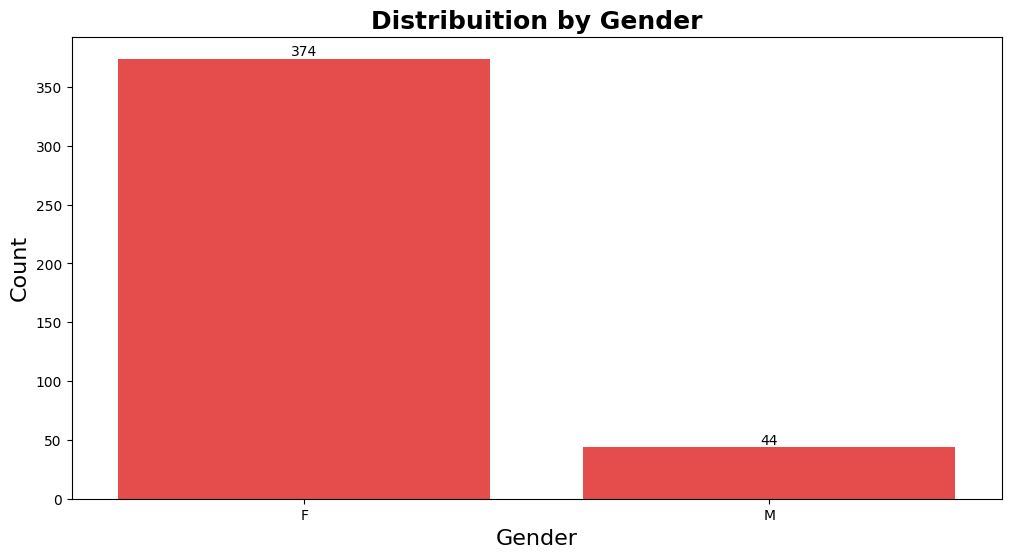

In [15]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Gender', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Sex'], color='red', alpha=0.8)
plt.xlabel('Gender', fontsize=16)
# plt.xticks(ticks=['F', 'M'], labels=['Female', 'Male'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

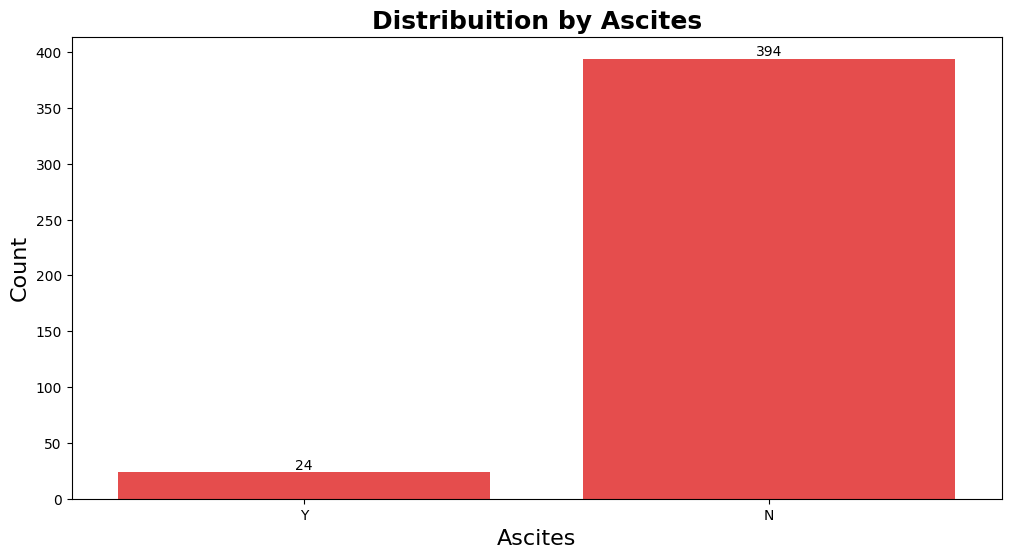

In [16]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Ascites', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Ascites'], color='red', alpha=0.8)
plt.xlabel('Ascites', fontsize=16)
# plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

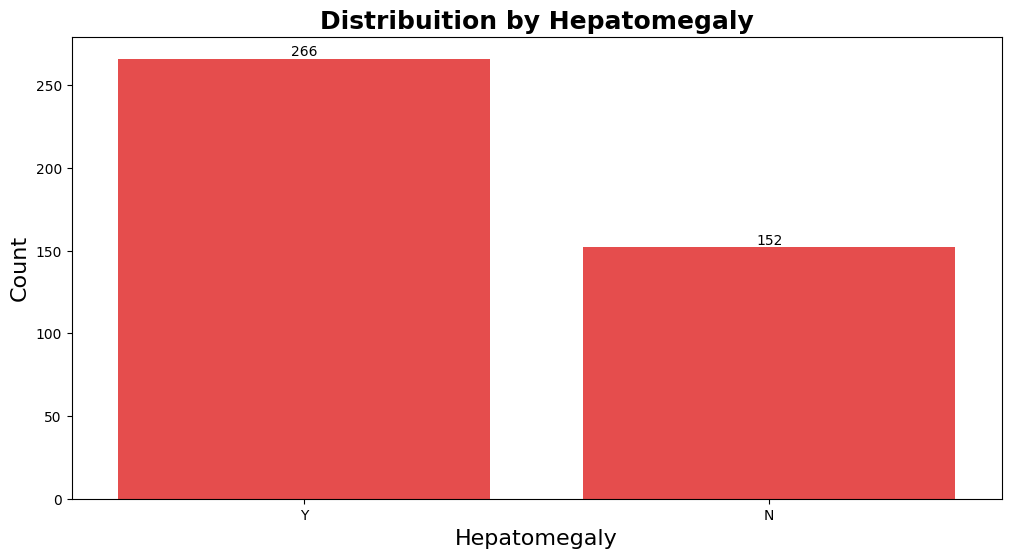

In [17]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Hepatomegaly', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Hepatomegaly'], color='red', alpha=0.8)
plt.xlabel('Hepatomegaly', fontsize=16)
# plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

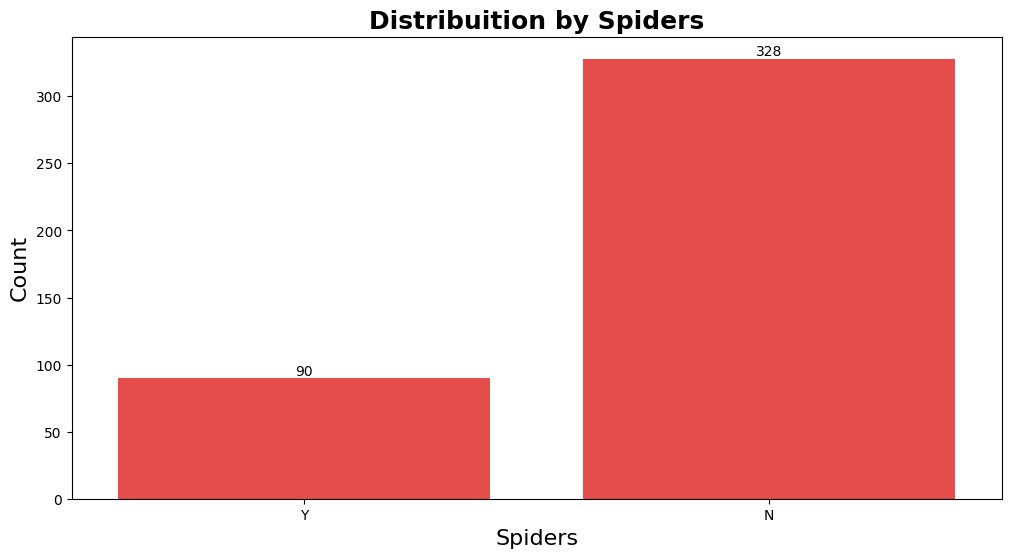

In [18]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Spiders', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Spiders'], color='red', alpha=0.8)
plt.xlabel('Spiders', fontsize=16)
# plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

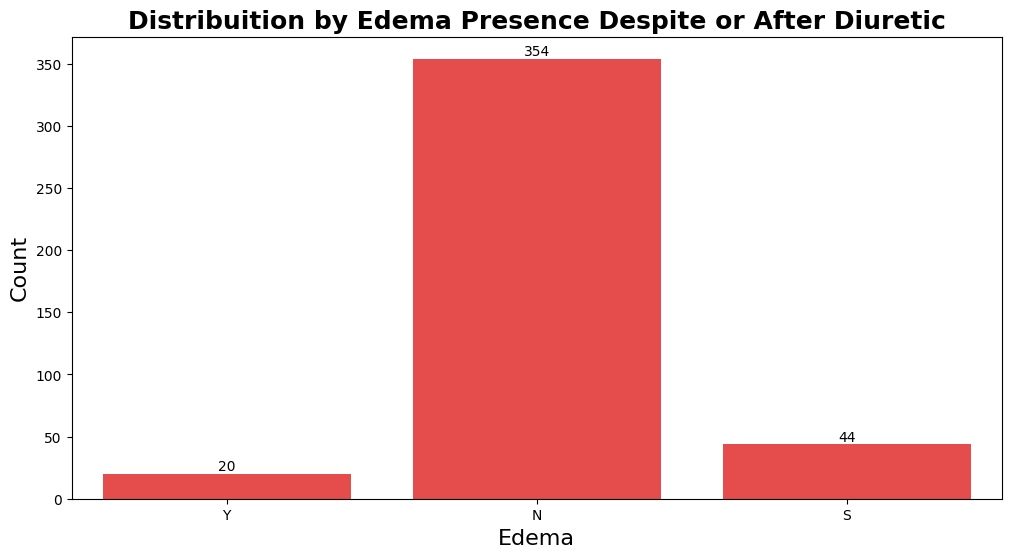

In [19]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Edema Presence Despite or After Diuretic', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Edema'], color='red', alpha=0.8)
plt.xlabel('Edema', fontsize=16)
# plt.xticks(ticks=['N', 'Y', 'S'], labels=['No Edema', 'Have Edema', 'Edema Resolved'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

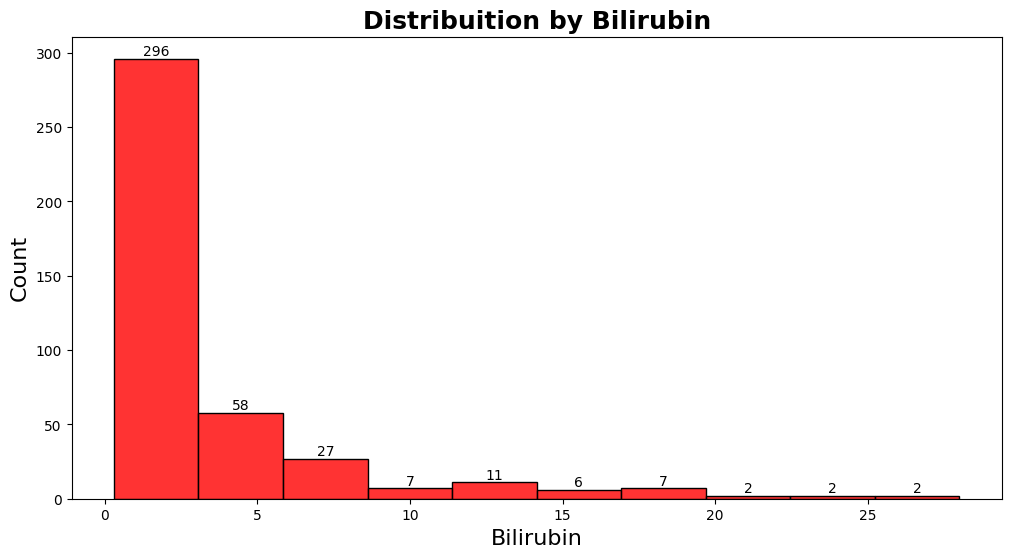

In [20]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Bilirubin', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Bilirubin'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Bilirubin', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

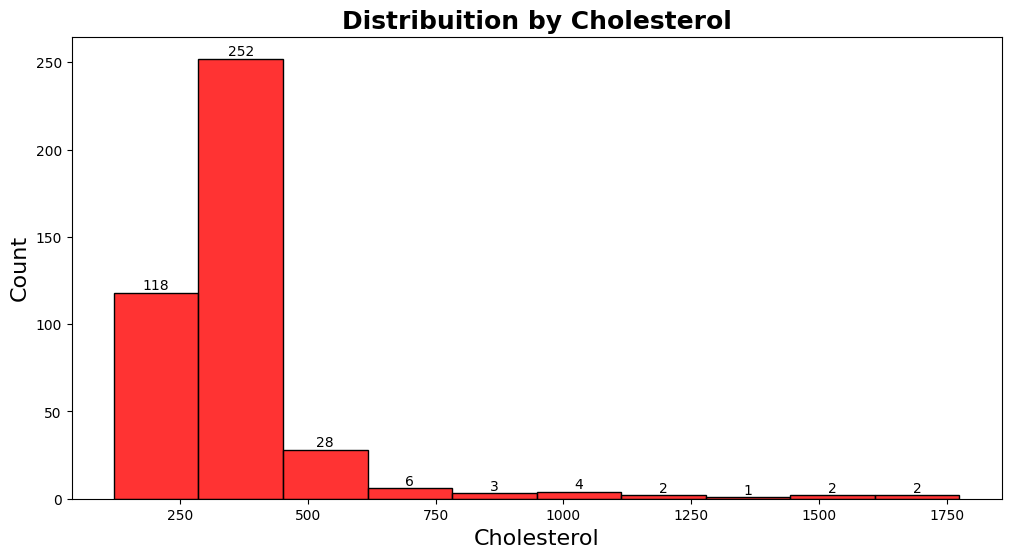

In [21]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Cholesterol', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Cholesterol'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Cholesterol', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

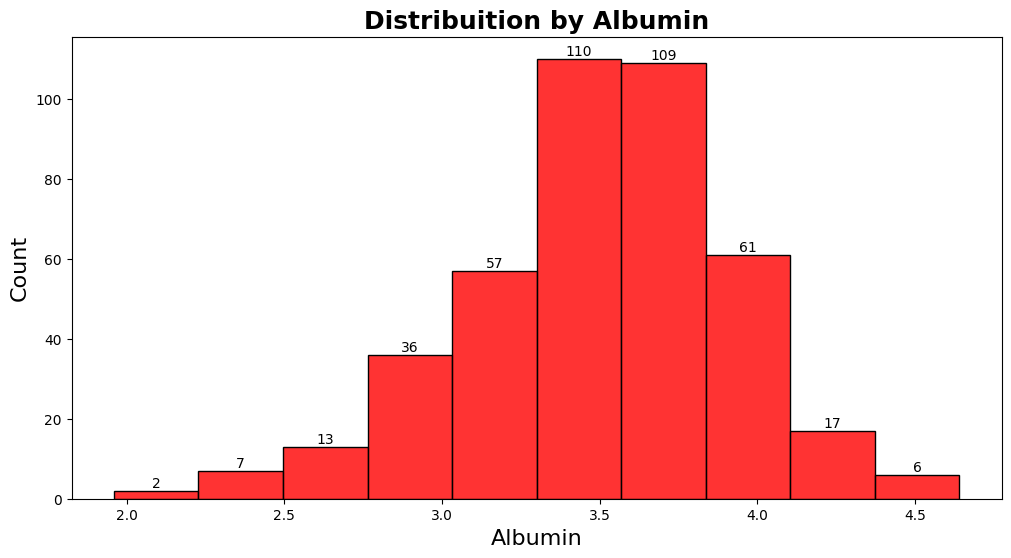

In [22]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Albumin', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Albumin'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Albumin', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

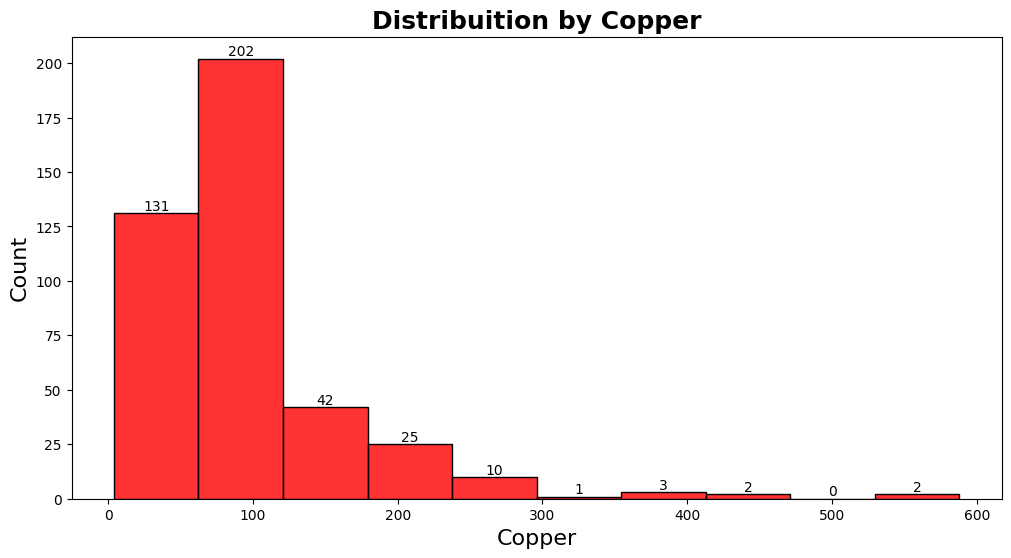

In [23]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Copper', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Copper'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Copper', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

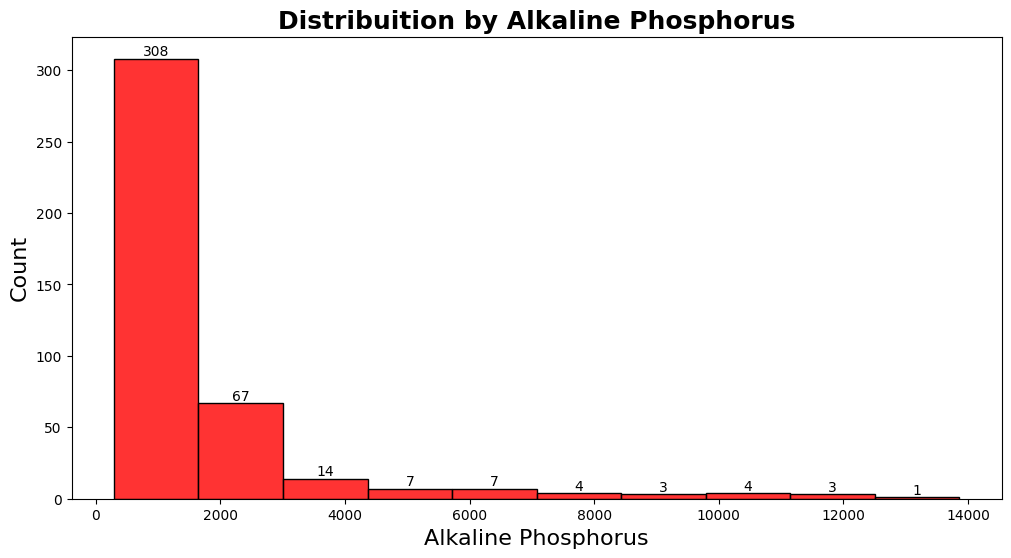

In [24]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Alkaline Phosphorus', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Alk_Phos'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Alkaline Phosphorus', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

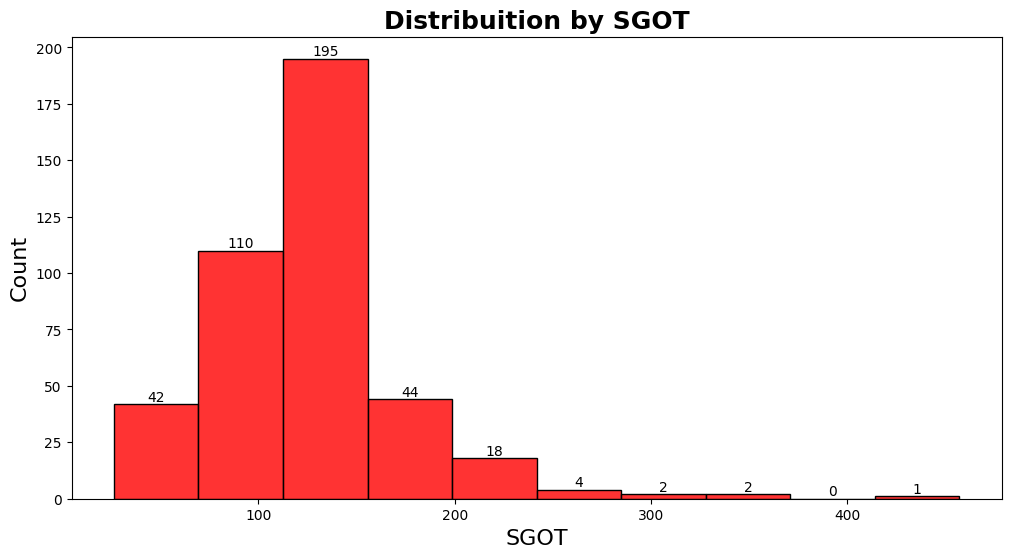

In [25]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by SGOT', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['SGOT'], bins=10,  color='red', alpha=0.8)
plt.xlabel('SGOT', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

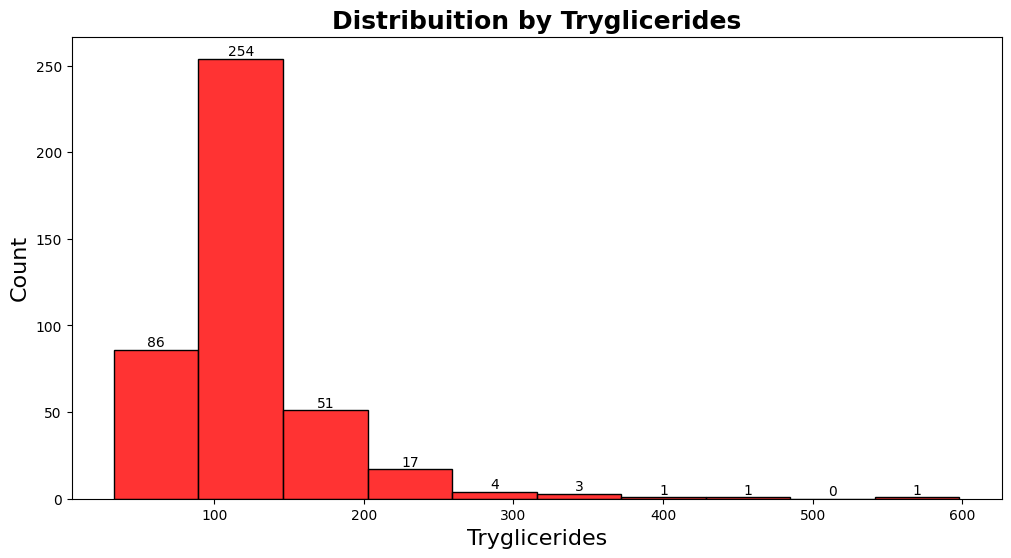

In [26]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Tryglicerides', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Tryglicerides'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Tryglicerides', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

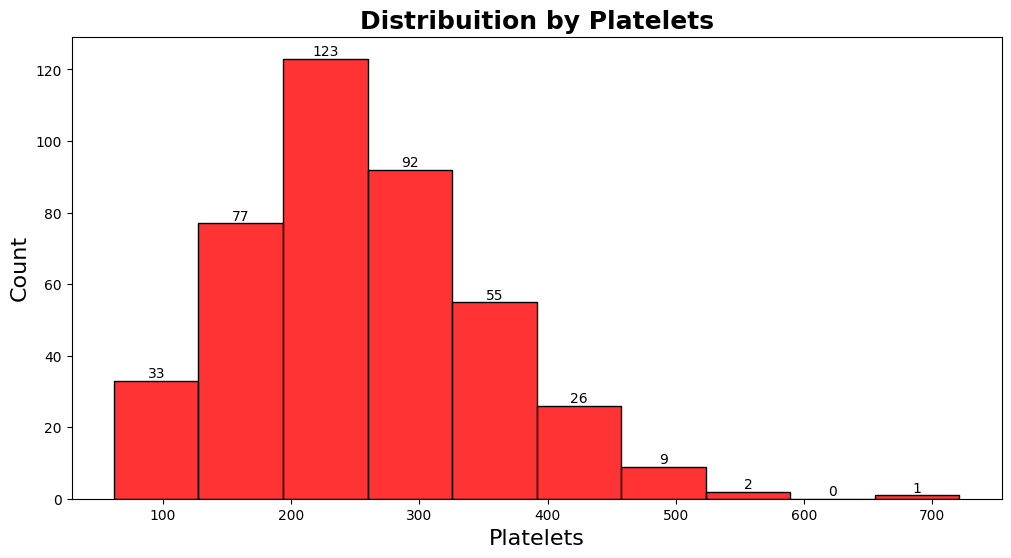

In [27]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Platelets', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Platelets'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Platelets', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

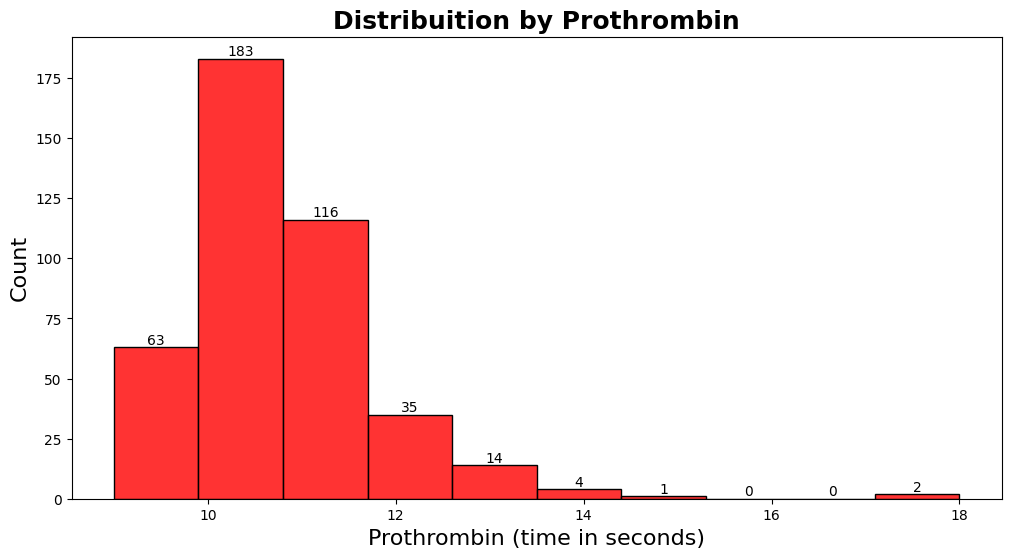

In [28]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Prothrombin', fontsize=18, fontweight='bold')
ax = sns.histplot(x=data['Prothrombin'], bins=10,  color='red', alpha=0.8)
plt.xlabel('Prothrombin (time in seconds)', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

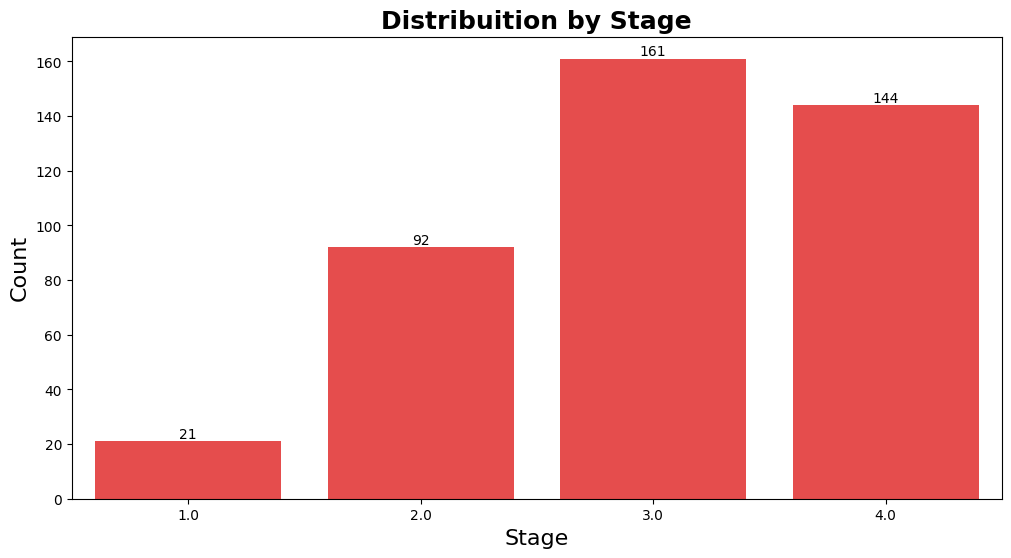

In [29]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Stage', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Stage'], color='red', alpha=0.8)
plt.xlabel('Stage', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

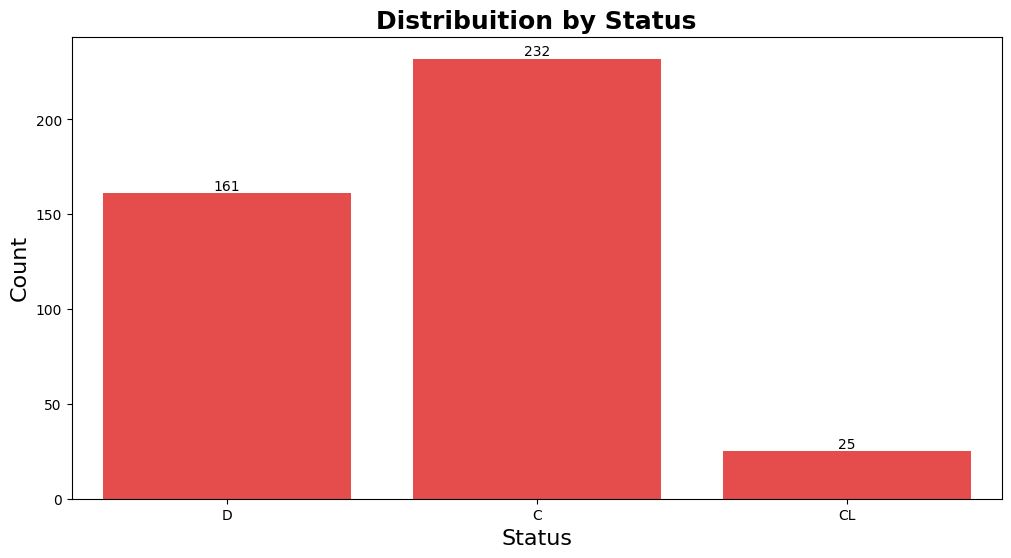

In [30]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Status', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Status'], color='red', alpha=0.8)
plt.xlabel('Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

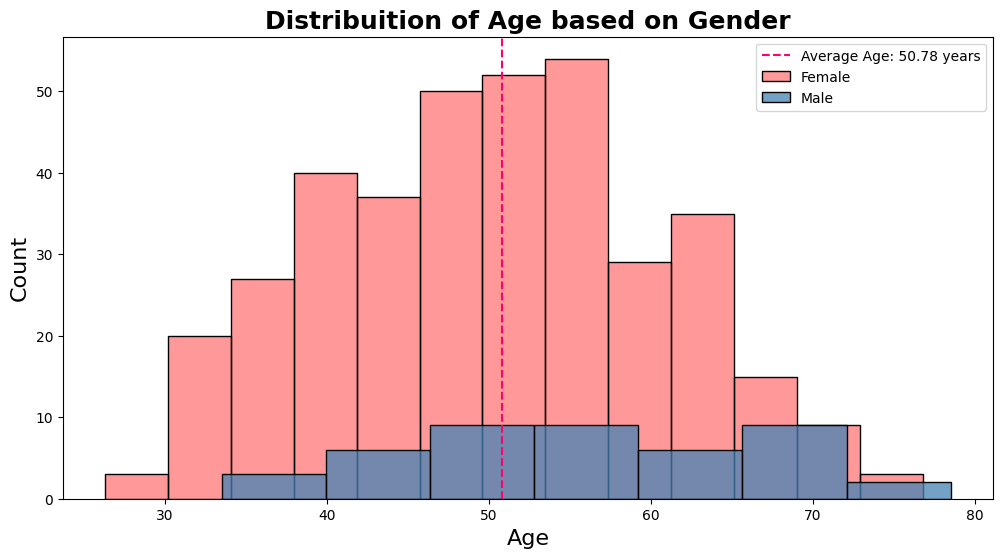

In [31]:
avg_age = np.mean(data['Age'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Age based on Gender', fontsize=18, fontweight='bold')
sns.histplot(data[data['Sex'] == 'F']['Age'], label='Female', color='red', alpha=0.4)
sns.histplot(data[data['Sex'] == 'M']['Age'], label='Male', color='steelblue')
plt.axvline(x=avg_age, color='#ff006e', linestyle='--', label=f'Average Age: {avg_age:.2f} years')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

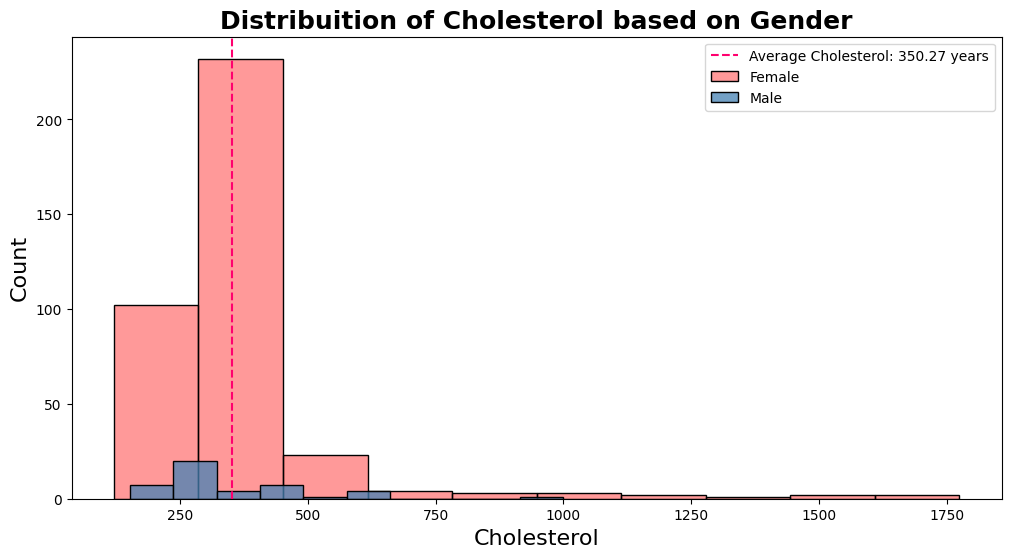

In [32]:
avg_chol = np.mean(data['Cholesterol'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Cholesterol based on Gender', fontsize=18, fontweight='bold')
sns.histplot(data[data['Sex'] == 'F']['Cholesterol'], bins=10, label='Female', color='red', alpha=0.4)
sns.histplot(data[data['Sex'] == 'M']['Cholesterol'], bins=10, label='Male', color='steelblue')
plt.axvline(x=avg_chol, color='#ff006e', linestyle='--', label=f'Average Cholesterol: {avg_chol:.2f} years')
plt.xlabel('Cholesterol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

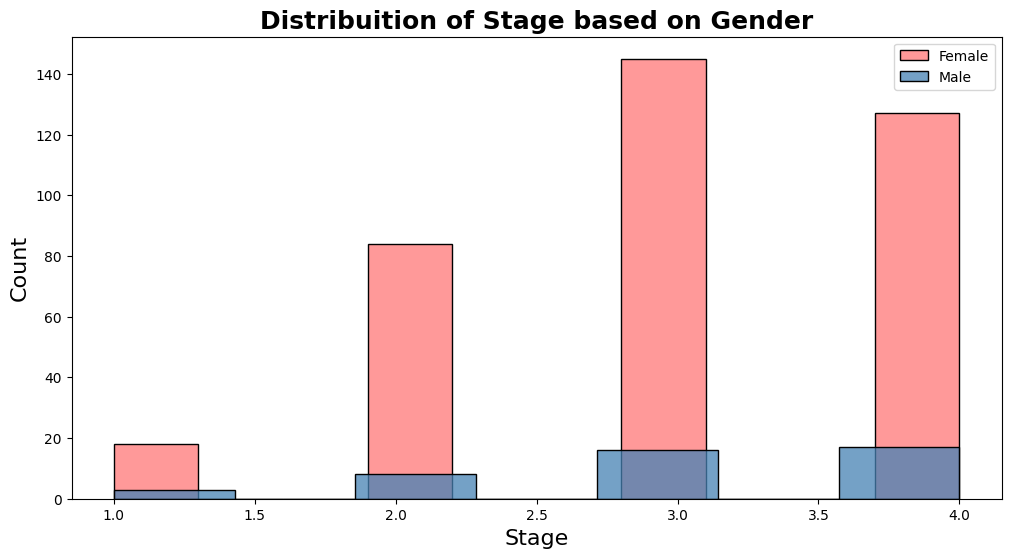

In [33]:
plt.figure(figsize=(12,6))
plt.title('Distribuition of Stage based on Gender', fontsize=18, fontweight='bold')
sns.histplot(data[data['Sex'] == 'F']['Stage'], label='Female', color='red', alpha=0.4)
sns.histplot(data[data['Sex'] == 'M']['Stage'], label='Male', color='steelblue')
plt.xlabel('Stage', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

## Data Transformaion

Machine Learning does not work with `String` value so I'll encode those values.

In [34]:
data['Status'].replace({'C':0, 'CL':1, 'D':2}, inplace=True)
data['Drug'].replace({'D-penicillamine':0, 'Placebo':1}, inplace=True)
data['Sex'].replace({'F':0, 'M':1}, inplace=True)
data['Ascites'].replace({'N':0, 'Y':1}, inplace=True)
data['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True)
data['Spiders'].replace({'N':0, 'Y':1}, inplace=True)
data['Edema'].replace({'N':0, 'S':1, 'Y':2}, inplace=True)

## Checking Correlation

<Axes: >

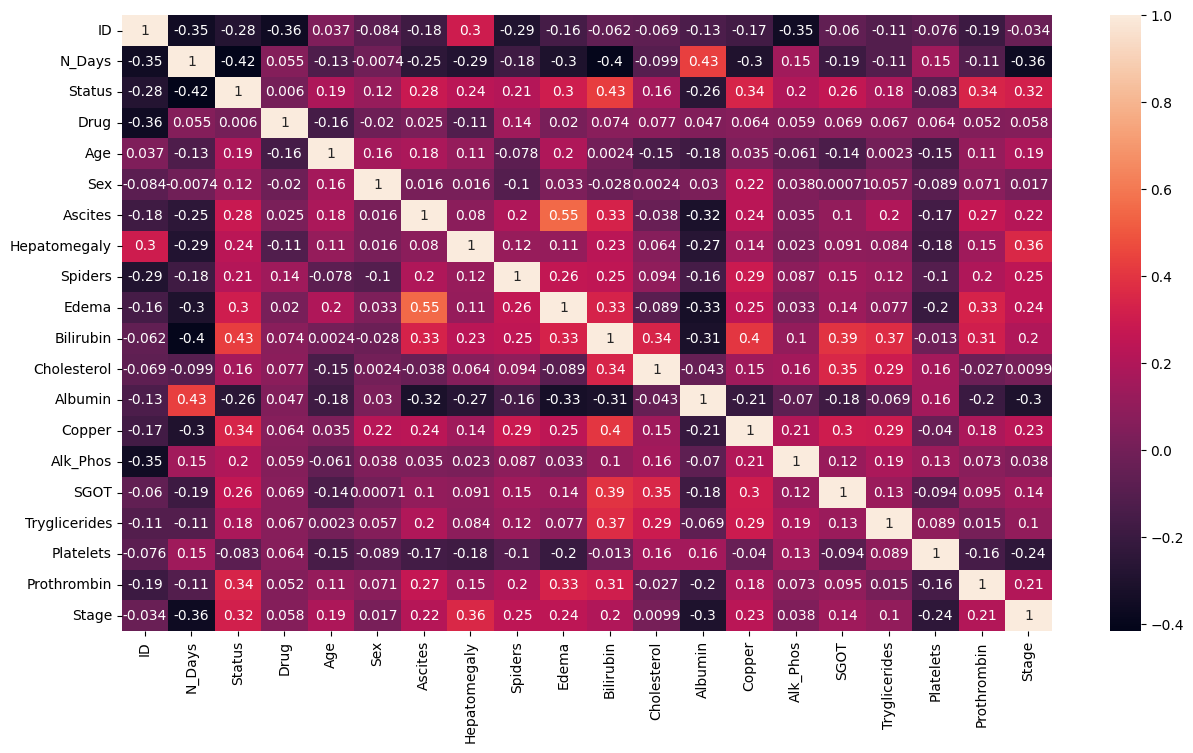

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

## Creating Features and Target column

In [36]:
X = data.drop(['Status'], axis=1)
y = data['Status']

## Feature Engineering

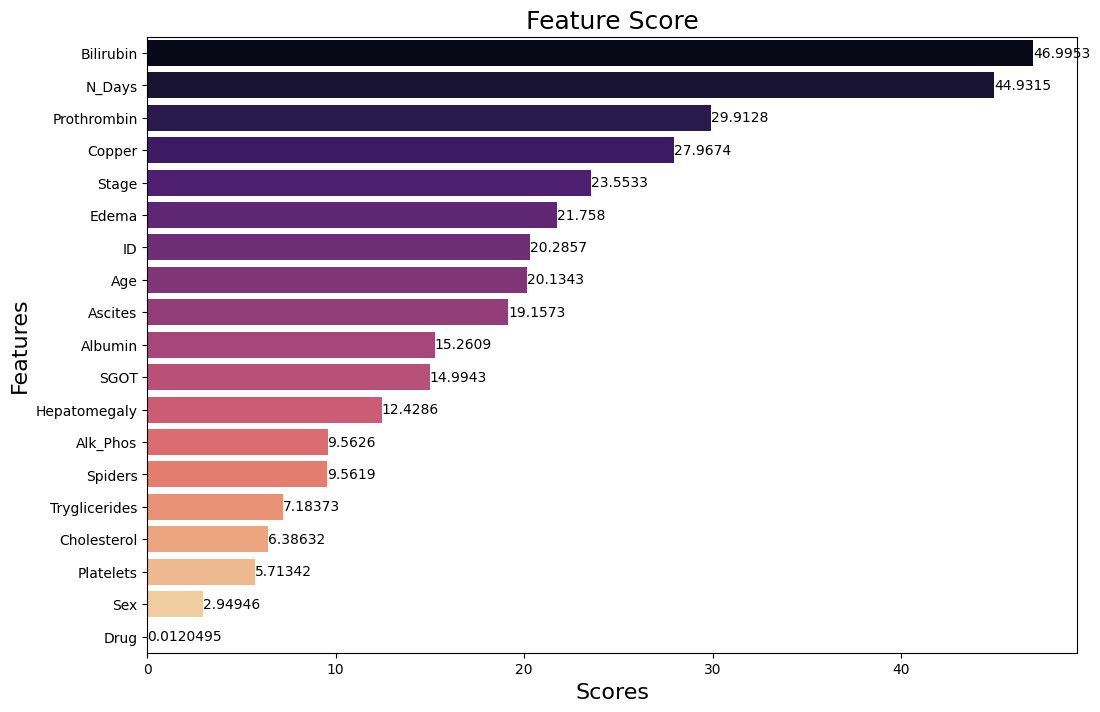

In [37]:
selector = SelectKBest(f_classif, k=19)
X_selected = selector.fit_transform(X,y)

## Creating list of all the columns and their score in variables
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

## Creating a New Dataframe to store features and their scores
feature_score_df = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

## Sort the created dataframe in descending order
feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

## Plot a barplot to for better understanding of the features and scores
plt.figure(figsize=(12,8))
ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')
plt.title('Feature Score', fontsize=18)
plt.xlabel('Scores', fontsize=16)
plt.ylabel('Features', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

In [38]:
X = X.drop(['Sex', 'Drug', 'Platelets', 'Cholesterol', 'Tryglicerides'], axis=1)

## Scaling the Data

In [39]:
col = X.columns

sc = StandardScaler()

X[col] = sc.fit_transform(X[col])
X.head()

,ID,N_Days,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Prothrombin,Stage
0,-1.727912,-1.375612,0.768941,4.051749,0.755929,1.909043,3.553818,2.562152,-2.114296,0.869937,-0.043326,0.354624,1.442407,1.115988
1,-1.719625,2.340341,0.546706,-0.246807,0.755929,1.909043,-0.396969,-0.481759,1.513818,-0.501099,2.987731,-0.143679,-0.128736,-0.027353
2,-1.711337,-0.820938,1.852567,-0.246807,-1.322876,-0.523823,1.578425,-0.413611,-0.041088,1.595779,-0.685119,-0.498998,1.246014,1.115988
3,-1.703050,0.006542,0.383244,-0.246807,0.755929,1.909043,1.578425,-0.322748,-2.255651,-0.366683,2.308028,-1.222487,-0.423325,1.115988
4,-1.694763,-0.375023,-1.210972,-0.246807,0.755929,1.909043,-0.396969,0.040704,0.076708,0.695197,-0.602359,-0.151226,0.165853,-0.027353


## Splitting the Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating the Model

In [41]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean', 'chebyshev']}

grid_knn = GridSearchCV(knn, params_knn, cv=6, n_jobs=-1)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

## Predicting Values

In [42]:
best_knn_model = grid_knn.best_estimator_

y_pred_knn = best_knn_model.predict(X_test)

## Evaluting the Model

In [46]:
print(f'Accuracy Score for {best_knn_model}: ' , accuracy_score(y_test,y_pred_knn))
import pickle
import os

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the model
with open('model/liver.pkl', 'wb') as f:
    pickle.dump(best_knn_model, f)


Accuracy Score for KNeighborsClassifier(metric='euclidean', n_neighbors=9):  0.8095238095238095


In [44]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        44
           1       0.00      0.00      0.00         4
           2       0.93      0.72      0.81        36

    accuracy                           0.81        84
   macro avg       0.56      0.56      0.55        84
weighted avg       0.79      0.81      0.79        84



Text(120.72222222222221, 0.5, 'Actual Value')

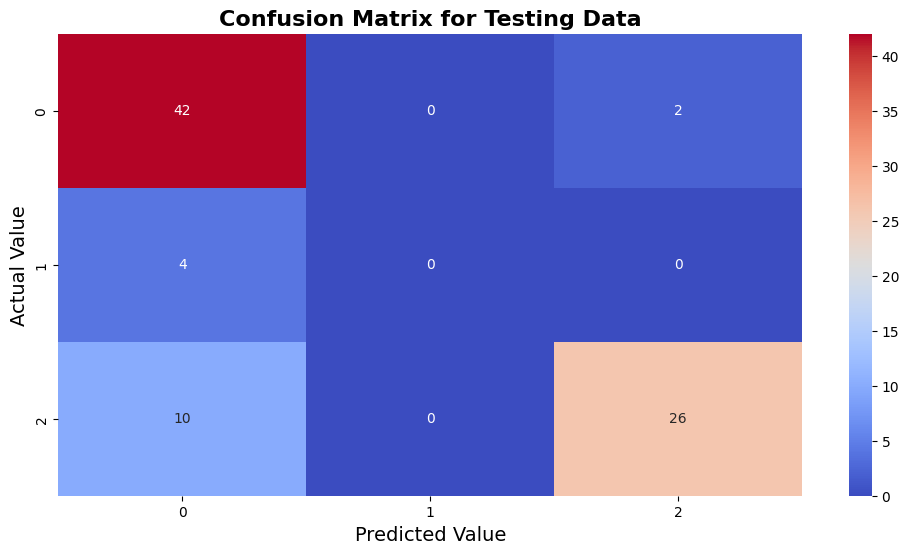

In [45]:
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix for Testing Data', fontsize=16, fontweight='bold')
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)